# Example of Signal Recovery 7270 driver usage

In [ ]:
"""
General driver notes:

With the SR_7270 read commands end with the echo "\n\x00",
and write commands return only "\x00".

ask_raw function has been rewritten to read echo to remove from buffer.
write_raw function has been rewritten to also read after writing using ask_raw.

Get commands ending with . as in 'X.' are known as floating point in manual.

Never change noise mode as TC values will not be correct.
(If you want to change this then the driver will need to updated.)

Change Imode for measuring current vs voltage using:
'CURRENT_MODE_OFF', 'CURRENT_MODE_ON_HIGH_BW', 'CURRENT_MODE_ON_LOW_BW

Change Vmode for measuring A, -B or A - B voltages using
'INPUTS_GNDED', 'A_INPUT_ONLY', '-B_INPUT_ONLY', 'A_B_DIFFERENTIAL'

Reference frequency is set by INT, EXT_REAR or EXT_FRONT.
If in mode INT then oscillator frequency changes reference frequency.
Otherwise, reference frequency controlled by input.

"""

In [1]:
import qcodes as qc
from qcodes import Station, load_or_create_experiment, \
    initialise_database, Measurement
from qcodes.dataset.plotting import plot_by_id
from qcodes.utils.dataset.doNd import do1d

# Connect to device

In [2]:
import qcodes_contrib_drivers.drivers.Ametek.SR_7270 as SR_7270
SR = SR_7270.Signalrecovery7270('SR', address='USB0::0x0A2D::0x001B::13086379::RAW')

In [3]:
SR.print_readable_snapshot(update=True)

SR:
	parameter    value
--------------------------------------------------------------------------------
IDN           :	{'vendor': '', 'model': None, 'serial': None, 'firmware': None} 
I_mode        :	CURRENT_MODE_OFF 
R             :	0 (V)
V_mode        :	A_INPUT_ONLY 
X             :	0 (V)
XY            :	0j (V)
Y             :	0 (V)
get_frequency :	77 (Hz)
noise_mode    :	OFF 
osc_amplitude :	0 (V)
osc_frequency :	77 (Hz)
phase         :	-180 (Degrees)
reference     :	INT 
sensitivity   :	0.1 (V)
timeconstant  :	0.1 (s)
timeout       :	5 (s)


# Setup db and station for test measurerment

In [5]:
# create an empty database based on the config file
qc.initialise_or_create_database_at('./test_signal_recovery_7270.db')

In [6]:
exp = load_or_create_experiment(experiment_name='test_signal_recovery_7270',
                          sample_name="output2input")

In [7]:
station = qc.Station(SR)

In [8]:
# Output is directly connect to A input
SR.reference('INT')
SR.Imode('CURRENT_MODE_OFF')
SR.Vmode('A_INPUT_ONLY')
SR.osc_frequency(77)
print('Reference frequency is ' + str(SR.getfrequency()) + ' Hz' )
print('Oscillator frequency is ' + str(SR.osc_frequency()) + ' Hz')
SR.sensitivity(.1)
SR.timeconstant(.1)

Reference frequency is 77.0 Hz
Oscillator frequency is 77.0 Hz


In [9]:
In_R = qc.ScaledParameter(SR.R, gain=1, name='R', unit='V')
In_phase = qc.ScaledParameter(SR.phase, gain=1, name='phase', unit='degrees')

output = qc.ScaledParameter(SR.osc_amplitude, gain=1, name='output', unit='V')  

Starting experimental run with id: 15. Using 'qcodes.utils.dataset.doNd.do1d'


(output_varied #15@C:\Users\g-gre-gre050342\Qcodes_contrib_drivers\docs\examples\test_signal_recovery_7270.db
 ------------------------------------------------------------------------------------------------------------
 output - numeric
 R - numeric
 phase - numeric,
 [<AxesSubplot:title={'center':'Run #15, Experiment test_signal_recovery_7270 (output2input)'}, xlabel='output (mV)', ylabel='R (mV)'>,
  <AxesSubplot:title={'center':'Run #15, Experiment test_signal_recovery_7270 (output2input)'}, xlabel='output (mV)', ylabel='phase (degrees)'>],
 [None, None])

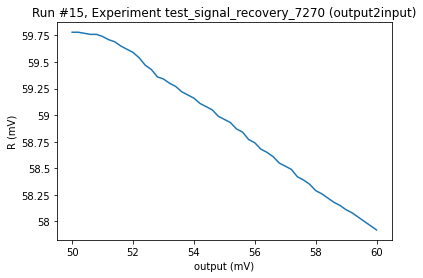

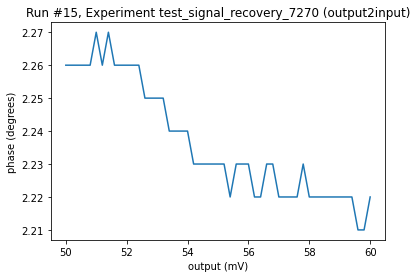

In [10]:
do1d(output, .05, .06, 51, 0, In_R, In_phase, do_plot = True,measurement_name='output_varied')

In [24]:
SR.osc_amplitude(0)